In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# ODE vector field visualizations
This notebook shows examples of functions Neural ODEs cannot approximate and how this affects the learned vector fields.

#### Create an ODE function

In [2]:
from anode.models import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

#### Visualize vector field of ODE function
We can visualize what the randomly initialized ODE function's vector field looks like.

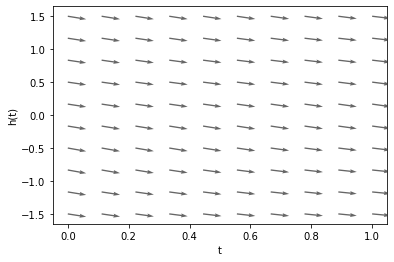

In [3]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

## Create functions to approximate

We will approximate two functions: an easy one (the identity mapping) and a hard one (correspond to g_1d in the paper)

In [11]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

#### Visualize the data

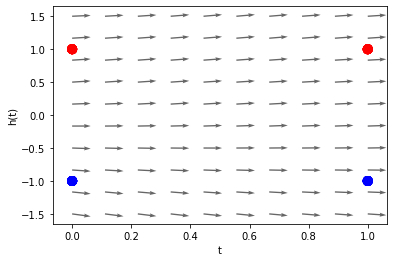

In [12]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

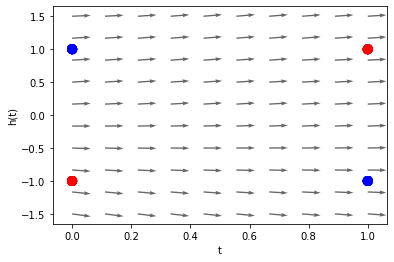

In [13]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

## Train a model on data

We can now try to fit a Neural ODE to the two functions

In [14]:
from anode.models import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

#### Train model on easy data

In [15]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.008
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 0.004
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 0.002
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 0.003

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 0.000

Iteration 0/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.000
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 0.000

Ite

#### Visualize model trajectories
As can be seen, the learned vector field maps the inputs to targets correctly.

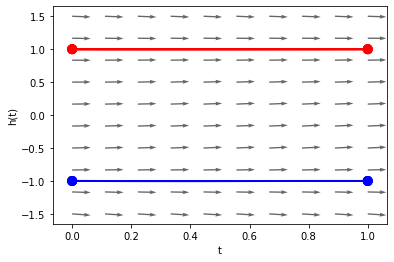

In [16]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

#### Train model on hard data

In [17]:
trainer_hard.train(dataloader_hard, num_epochs=50)


Iteration 0/16
Loss: 1.415
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.391
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.475
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.380
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 1.414

Iteration 0/16
Loss: 1.418
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.348
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.429
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.303
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 1.384

Iteration 0/16
Loss: 1.328
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.348
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.355
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.344
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 1.356

Iteration 0/16
Loss: 1.328
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 1.257
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.306
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 1.358
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 1.324

Ite


Iteration 10/16
Loss: 0.579
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 0.692
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 34: 0.579

Iteration 0/16
Loss: 0.577
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 0.539
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 0.520
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 0.543
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 35: 0.570

Iteration 0/16
Loss: 0.623
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 0.603
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 0.550
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 0.620
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 36: 0.566

Iteration 0/16
Loss: 0.514
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 0.581
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 0.563
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 0.620
NFE: 38
BNFE: 0
Total NFE: 38
Epoch 37: 0.562

Iteration 0/16
Loss: 0.549
NFE: 38
BNFE: 0
Total NFE: 38

Iteration 5/16
Loss: 0.613
NFE: 38
BNFE: 0
Total NFE: 38


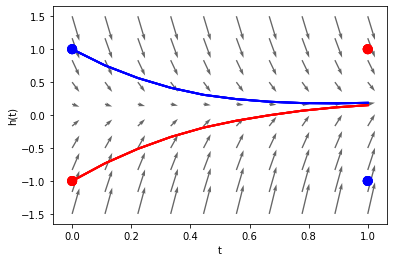

In [18]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)

## Augmented Neural ODEs
As can be seen, Neural ODEs struggle to fit the hard function. In fact, it can be proven that Neural ODEs cannot represent this function. In order to overcome this, we can use Augmented Neural ODEs which extend the space on which the ODE is solved. Examples of this are shown in the `augmented-neural-ode-example` notebook.